# Competition for glucose, with internal goods X and Y, and social objective (model), linear/exponential growth rate

In [1]:
import cobra
import pandas as pd
import numpy as np
import pickle
from cobra.flux_analysis import pfba

In [2]:
# import map visualization tools
from utils import show_map
import escher
map_loc = 'Two cell system model_map.json' # the escher map used below
# show all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

M = cobra.io.load_json_model('Two cell system model.json')
model = M.copy()

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


/Users/yanhualiu/Desktop/New_topic/model_building/model_building_exercise_by_yanhua/Cells' competition paper/Two cell types considering growth for paper/utils/findBiomarkers.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
b = show_map([],map_loc)
b

An empty solution was passed.


Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={}, reaction_scale=[{'type': '…

In [4]:
### Internal goods X and Y
model.reactions.EX_Com_goodX_e.lower_bound=0
model.reactions.EX_Com_goodY_e.lower_bound=0
model.reactions.EX_glucose_e.lower_bound=-1

In [5]:
fbasol = pfba(model)
b = show_map(fbasol,map_loc)
b

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'EX_glucose_e': -1.0, 'GlcT':…

In [6]:
### FVA result
rxnsOfInterest=['EX_glucose_e','GlcT','GTI1','GTI2','biomass1','biomass2','DI1X','DI2Y']
fvasol = cobra.flux_analysis.flux_variability_analysis(model,reaction_list=rxnsOfInterest,fraction_of_optimum=1)
fvasol

,minimum,maximum
EX_glucose_e,-1.00,-1.00
GlcT,1.00,1.00
GTI1,0.25,0.75
GTI2,0.25,0.75
biomass1,0.00,0.50
biomass2,0.00,0.50
DI1X,0.25,0.25
DI2Y,0.25,0.25


In [7]:
model.solver='glpk'
sol = model.optimize()
sol.objective_value

0.5

## Growing with time (Stepwise growth) for time variant  death rate (constant biomass synthesis)

### µ1=0.2; µ2=0.3

In [8]:
model2=model.copy()

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 't (month)')

(0.0, 1.0)

Text(0.5, 1.0, 'Time variant death rates ($\\beta=0.05$)')

Text(0, 0.5, 'Specific death rate')

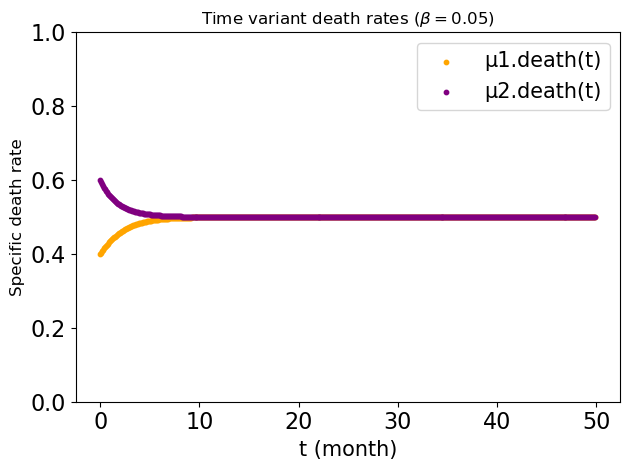

In [9]:
import math
import matplotlib.pyplot as plt
plt.figure()
T_list=[]
Fluxes1_list=[]
Fluxes2_list=[]
b1_list=[]
b2_list=[]
µ1_list=[]
µ2_list=[]
# Store the values of B1 and B2 for each time step in lists.
B1_vals = []
B2_vals = []

def B1(t):
    if t <= 0:
        return 0.5
    return (0.5*0.5*math.exp(-0.5*t/10)+0.2*(1-math.exp(-0.5*t/10)))/0.5
            
def B2(t):
    if t <= 0:
        return 0.5
    return (0.5*0.5*math.exp(-0.5*t/10)+0.3*(1-math.exp(-0.5*t/10)))/0.5
            
for t in np.arange(0,500,1):
    B1_t = B1(t)
    B2_t = B2(t)
  
    b1=0.2
    b2=0.3
    b1_list.append(b1)
    b2_list.append(b2)
    B1_vals.append(B1_t)
    B2_vals.append(B2_t)
    µ1=0.5*0.2/((0.5*0.5*math.exp(-0.5*t/10))+0.2*(1-math.exp(-0.5*t/10)))
    µ2=0.5*0.3/((0.5*0.5*math.exp(-0.5*t/10))+0.3*(1-math.exp(-0.5*t/10)))
    µ1_list.append(µ1)
    µ2_list.append(µ2)
    model2.reactions.biomass1.upper_bound=b1
    model2.reactions.biomass2.upper_bound=b2
    model2.reactions.DI1X.upper_bound=3*B1_vals[-1]
    model2.reactions.DI2Y.upper_bound=3*B2_vals[-1]
    sol = model2.optimize()
    obj_val = sol.objective_value
    Fluxes1=sol.fluxes.loc['biomass1']
    Fluxes2=sol.fluxes.loc['biomass2']
    Fluxes3=sol.fluxes.loc['DI1X']
    Fluxes4=sol.fluxes.loc['DI2Y']
    Fluxes5=sol.fluxes.loc['EX_glucose_e']
    Fluxes1_list.append(Fluxes1)
    Fluxes2_list.append(Fluxes2)

    T=t/10
    T_list.append(T)

# plt.scatter(T_list,B1_vals,color='orange',s=10)
# plt.scatter(T_list,B2_vals,color='purple',s=10)
plt.scatter(T_list,µ1_list,color='orange',s=10)
plt.scatter(T_list,µ2_list,color='purple',s=10)
plt.xlabel("t (month)",fontsize=15)


# plt.ylim(0,1)
# plt.title('Cell number in time variant death rate',fontsize=12)
# plt.ylabel("Cell number",fontsize=12)
# plt.legend(['B1(t)','B2(t)'],loc='upper right')

plt.ylim(0,1)
plt.title('Time variant death rates ('r'$\beta=0.05$'')',fontsize=12)
plt.ylabel("Specific death rate",fontsize=12)
plt.legend(['µ1.death(t)','µ2.death(t)'],loc='upper right')

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.rcParams['legend.fontsize']=15
plt.tight_layout()

# plt.show()
plt.savefig('Two cell lines (Stepwise growth)(Obj=b1+b2))',dpi=300)

In [53]:
print(µ1_list[-1],µ2_list[-1])

0.499999999998175 0.5000000000012166


### µ1=0.15; µ2=0.35

In [10]:
model2=model.copy()

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 't (month)')

(0.0, 1.0)

Text(0.5, 1.0, 'Time variant death rates ($\\beta=0.1$)')

Text(0, 0.5, 'Specific death rate')

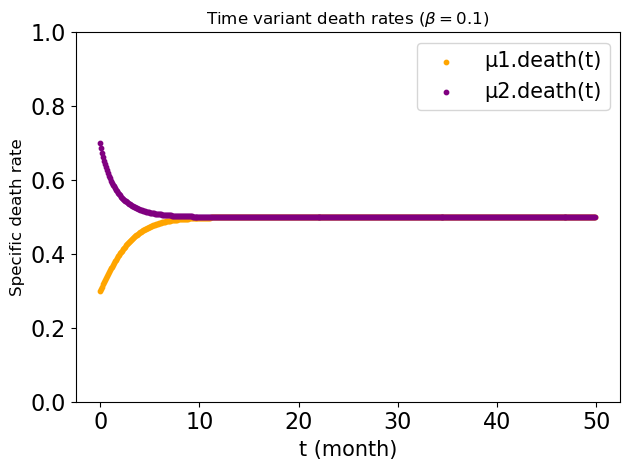

In [11]:
import math
import matplotlib.pyplot as plt
plt.figure()
T_list=[]
Fluxes1_list=[]
Fluxes2_list=[]
b1_list=[]
b2_list=[]
µ1_list=[]
µ2_list=[]
# Store the values of B1 and B2 for each time step in lists.
B1_vals = []
B2_vals = []

def B1(t):
    if t <= 0:
        return 0.5
    return (0.5*0.5*math.exp(-0.5*t/10)+0.15*(1-math.exp(-0.5*t/10)))/0.5
            
def B2(t):
    if t <= 0:
        return 0.5
    return (0.5*0.5*math.exp(-0.5*t/10)+0.35*(1-math.exp(-0.5*t/10)))/0.5
            
for t in np.arange(0,500,1):
    B1_t = B1(t)
    B2_t = B2(t)
  
    b1=0.15
    b2=0.35
    b1_list.append(b1)
    b2_list.append(b2)
    B1_vals.append(B1_t)
    B2_vals.append(B2_t)
    µ1=0.5*0.15/((0.5*0.5*math.exp(-0.5*t/10))+0.15*(1-math.exp(-0.5*t/10)))
    µ2=0.5*0.35/((0.5*0.5*math.exp(-0.5*t/10))+0.35*(1-math.exp(-0.5*t/10)))
    µ1_list.append(µ1)
    µ2_list.append(µ2)
    model2.reactions.biomass1.upper_bound=b1
    model2.reactions.biomass2.upper_bound=b2
    model2.reactions.DI1X.upper_bound=3*B1_vals[-1]
    model2.reactions.DI2Y.upper_bound=3*B2_vals[-1]
    sol = model2.optimize()
    obj_val = sol.objective_value
    Fluxes1=sol.fluxes.loc['biomass1']
    Fluxes2=sol.fluxes.loc['biomass2']
    Fluxes3=sol.fluxes.loc['DI1X']
    Fluxes4=sol.fluxes.loc['DI2Y']
    Fluxes5=sol.fluxes.loc['EX_glucose_e']
    Fluxes1_list.append(Fluxes1)
    Fluxes2_list.append(Fluxes2)

    T=t/10
    T_list.append(T)

# plt.scatter(T_list,B1_vals,color='orange',s=10)
# plt.scatter(T_list,B2_vals,color='purple',s=10)
plt.scatter(T_list,µ1_list,color='orange',s=10)
plt.scatter(T_list,µ2_list,color='purple',s=10)
plt.xlabel("t (month)",fontsize=15)


# plt.ylim(0,1)
# plt.title('Cell number in time variant death rate',fontsize=12)
# plt.ylabel("Cell number",fontsize=12)
# plt.legend(['B1(t)','B2(t)'],loc='upper right')

plt.ylim(0,1)
plt.title('Time variant death rates ('r'$\beta=0.1$'')',fontsize=12)
plt.ylabel("Specific death rate",fontsize=12)
plt.legend(['µ1.death(t)','µ2.death(t)'],loc='upper right')

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.rcParams['legend.fontsize']=15
plt.tight_layout()

# plt.show()
plt.savefig('Two cell lines (Stepwise growth)(Obj=b1+b2))',dpi=300)

In [ ]:
print(µ1_list[-1],µ2_list[-1])

### µ1=0.05; µ2=0.45

In [12]:
model2=model.copy()

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 't (month)')

(0.0, 1.0)

Text(0.5, 1.0, 'Time variant death rates ($\\beta=0.2$)')

Text(0, 0.5, 'Specific death rate')

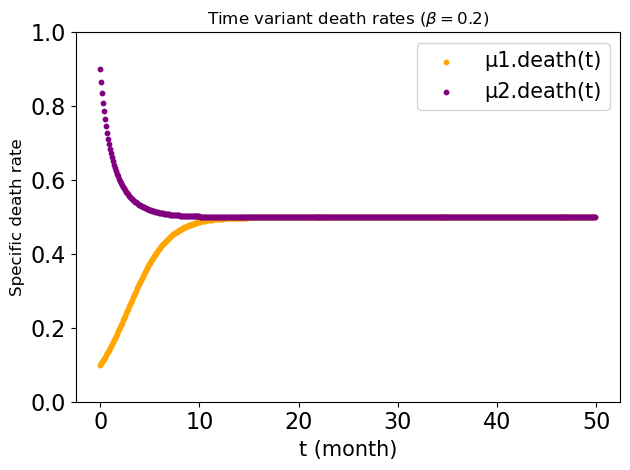

In [13]:
import math
import matplotlib.pyplot as plt
plt.figure()
T_list=[]
Fluxes1_list=[]
Fluxes2_list=[]
b1_list=[]
b2_list=[]
µ1_list=[]
µ2_list=[]
# Store the values of B1 and B2 for each time step in lists.
B1_vals = []
B2_vals = []

def B1(t):
    if t <= 0:
        return 0.5
    return (0.5*0.5*math.exp(-0.5*t/10)+0.05*(1-math.exp(-0.5*t/10)))/0.5
            
def B2(t):
    if t <= 0:
        return 0.5
    return (0.5*0.5*math.exp(-0.5*t/10)+0.45*(1-math.exp(-0.5*t/10)))/0.5
            
for t in np.arange(0,500,1):
    B1_t = B1(t)
    B2_t = B2(t)
  
    b1=0.05
    b2=0.45
    b1_list.append(b1)
    b2_list.append(b2)
    B1_vals.append(B1_t)
    B2_vals.append(B2_t)
    µ1=0.5*0.05/((0.5*0.5*math.exp(-0.5*t/10))+0.05*(1-math.exp(-0.5*t/10)))
    µ2=0.5*0.45/((0.5*0.5*math.exp(-0.5*t/10))+0.45*(1-math.exp(-0.5*t/10)))
    µ1_list.append(µ1)
    µ2_list.append(µ2)
    model2.reactions.biomass1.upper_bound=b1
    model2.reactions.biomass2.upper_bound=b2
    model2.reactions.DI1X.upper_bound=3*B1_vals[-1]
    model2.reactions.DI2Y.upper_bound=3*B2_vals[-1]
    sol = model2.optimize()
    obj_val = sol.objective_value
    Fluxes1=sol.fluxes.loc['biomass1']
    Fluxes2=sol.fluxes.loc['biomass2']
    Fluxes3=sol.fluxes.loc['DI1X']
    Fluxes4=sol.fluxes.loc['DI2Y']
    Fluxes5=sol.fluxes.loc['EX_glucose_e']
    Fluxes1_list.append(Fluxes1)
    Fluxes2_list.append(Fluxes2)

    T=t/10
    T_list.append(T)

# plt.scatter(T_list,B1_vals,color='orange',s=10)
# plt.scatter(T_list,B2_vals,color='purple',s=10)
plt.scatter(T_list,µ1_list,color='orange',s=10)
plt.scatter(T_list,µ2_list,color='purple',s=10)
plt.xlabel("t (month)",fontsize=15)


# plt.ylim(0,1)
# plt.title('Cell number in time variant death rate',fontsize=12)
# plt.ylabel("Cell number",fontsize=12)
# plt.legend(['B1(t)','B2(t)'],loc='upper right')

plt.ylim(0,1)
plt.title('Time variant death rates ('r'$\beta=0.2$'')',fontsize=12)
plt.ylabel("Specific death rate",fontsize=12)
plt.legend(['µ1.death(t)','µ2.death(t)'],loc='upper right')

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.rcParams['legend.fontsize']=15
plt.tight_layout()

# plt.show()
plt.savefig('Two cell lines (Stepwise growth)(Obj=b1+b2))',dpi=300)

In [50]:
print(µ1_list[-1],µ2_list[-1])

0.4999999999708 0.5000000000032444
